In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import numpy as np
import cv2
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Extract HOG features from an image
def extract_hog_features(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (256, 256))
    hog_features, _ = hog(image, pixels_per_cell=(8, 8), cells_per_block=(3, 3), feature_vector=True, visualize=True)
    return hog_features



In [ ]:
dataset_path = "/content/drive/MyDrive/Data/Data/images_original"
labels = []
features = []

# Load dataset
for genre in os.listdir(dataset_path):
    genre_path = os.path.join(dataset_path, genre)
    if os.path.isdir(genre_path):
        for file in os.listdir(genre_path):
            if file.endswith(('.png', '.jpg', '.jpeg')):
                file_path = os.path.join(genre_path, file)
                feature = extract_hog_features(file_path)
                features.append(feature)
                labels.append(genre)

if len(features) == 0:
    raise ValueError("No images found or failed to extract features. Check dataset path and image format.")

# Convert to numpy arrays
features = np.array(features)
labels = np.array(labels)

In [ ]:
#Normalize
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [ ]:
# encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}\n")



In [ ]:
 #KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
evaluate_model(knn, X_test, y_test, "KNN")

KNN Performance:
Accuracy: 0.43
Precision: 0.47
Recall: 0.43
F1 Score: 0.42



In [ ]:
# SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
evaluate_model(svm, X_test, y_test, "SVM")

SVM Performance:
Accuracy: 0.83
Precision: 0.84
Recall: 0.83
F1 Score: 0.83



In [ ]:
 #Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
evaluate_model(rf, X_test, y_test, "Random Forest")

Random Forest Performance:
Accuracy: 0.69
Precision: 0.69
Recall: 0.69
F1 Score: 0.69



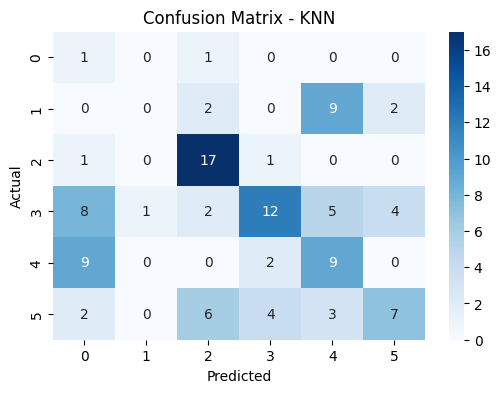

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.05      0.50      0.09         2
           1       0.00      0.00      0.00        13
           2       0.61      0.89      0.72        19
           3       0.63      0.38      0.47        32
           4       0.35      0.45      0.39        20
           5       0.54      0.32      0.40        22

    accuracy                           0.43       108
   macro avg       0.36      0.42      0.35       108
weighted avg       0.47      0.43      0.42       108

Reducing dimensions to 2 using PCA for visualization.


<Figure size 600x400 with 0 Axes>

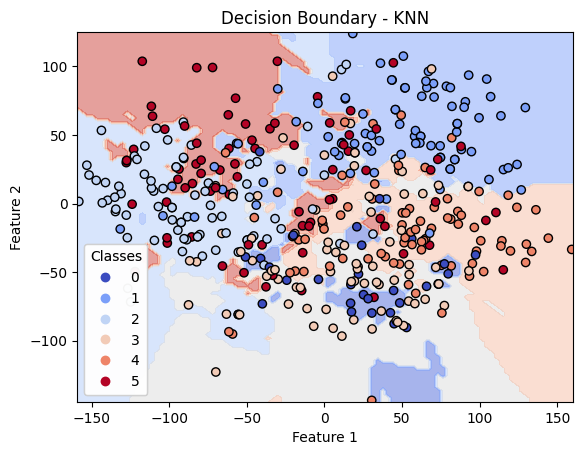

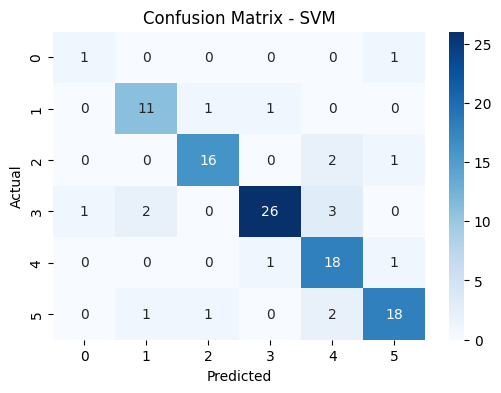

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.79      0.85      0.81        13
           2       0.89      0.84      0.86        19
           3       0.93      0.81      0.87        32
           4       0.72      0.90      0.80        20
           5       0.86      0.82      0.84        22

    accuracy                           0.83       108
   macro avg       0.78      0.79      0.78       108
weighted avg       0.84      0.83      0.83       108

Reducing dimensions to 2 using PCA for visualization.


<Figure size 600x400 with 0 Axes>

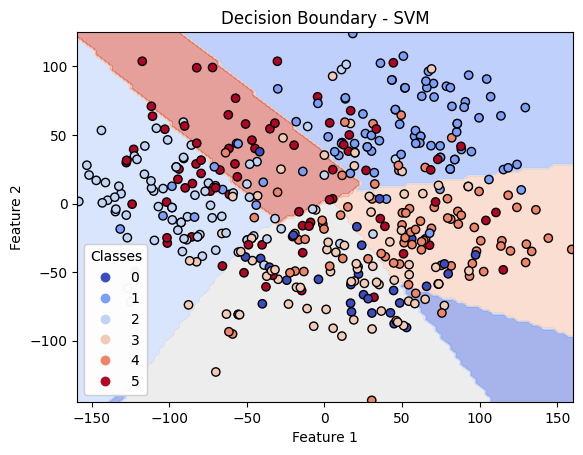

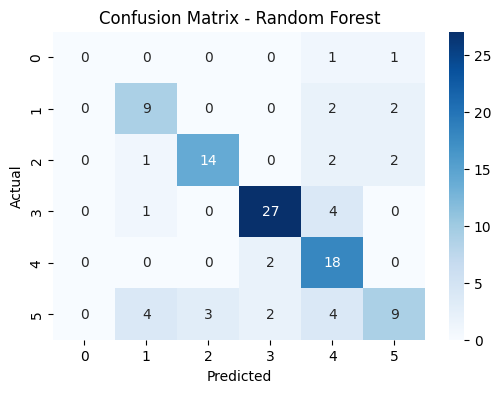

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         2
           1       0.60      0.69      0.64        13
           2       0.82      0.74      0.78        19
           3       0.87      0.84      0.86        32
           4       0.58      0.90      0.71        20
           5       0.64      0.41      0.50        22

    accuracy                           0.71       108
   macro avg       0.75      0.60      0.58       108
weighted avg       0.73      0.71      0.70       108

Reducing dimensions to 2 using PCA for visualization.


<Figure size 600x400 with 0 Axes>

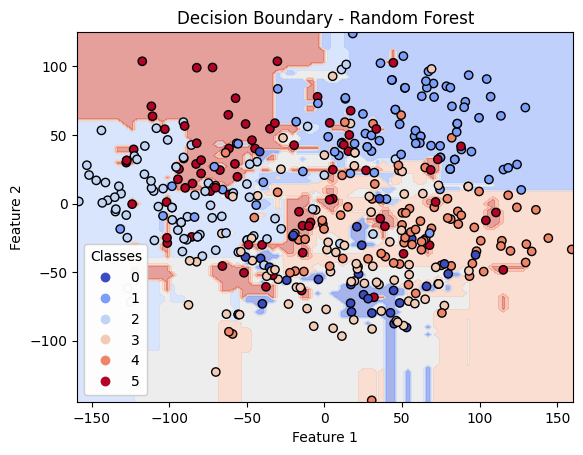

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    print(f'Classification Report for {model_name}:')
    print(classification_report(y_test, y_pred, zero_division=1))

def plot_decision_boundary(model, X, y, model_name):
    if X.shape[1] > 2:
        print("Reducing dimensions to 2 using PCA for visualization.")
        pca = PCA(n_components=2)
        X = pca.fit_transform(X)

        # Train a new model on reduced features
        if isinstance(model, KNeighborsClassifier):
            model = KNeighborsClassifier(n_neighbors=5)
        elif isinstance(model, SVC):
            model = SVC(kernel='linear')
        elif isinstance(model, RandomForestClassifier):
            model = RandomForestClassifier(n_estimators=100)

        model.fit(X, y)

    plt.figure(figsize=(6, 4))
    DecisionBoundaryDisplay.from_estimator(model, X, cmap=plt.cm.coolwarm, alpha=0.5)

    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
    plt.gca().add_artist(legend1)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(f'Decision Boundary - {model_name}')
    plt.show()

# Initialize models
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='linear', probability=True, max_iter=1000)

rf = RandomForestClassifier(n_estimators=100)

# Train models
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Plot for each model
plot_confusion_matrix(knn, X_test, y_test, "KNN")
plot_decision_boundary(knn, X_train, y_train, "KNN")

plot_confusion_matrix(svm, X_test, y_test, "SVM")
plot_decision_boundary(svm, X_train, y_train, "SVM")

plot_confusion_matrix(rf, X_test, y_test, "Random Forest")
plot_decision_boundary(rf, X_train, y_train, "Random Forest")

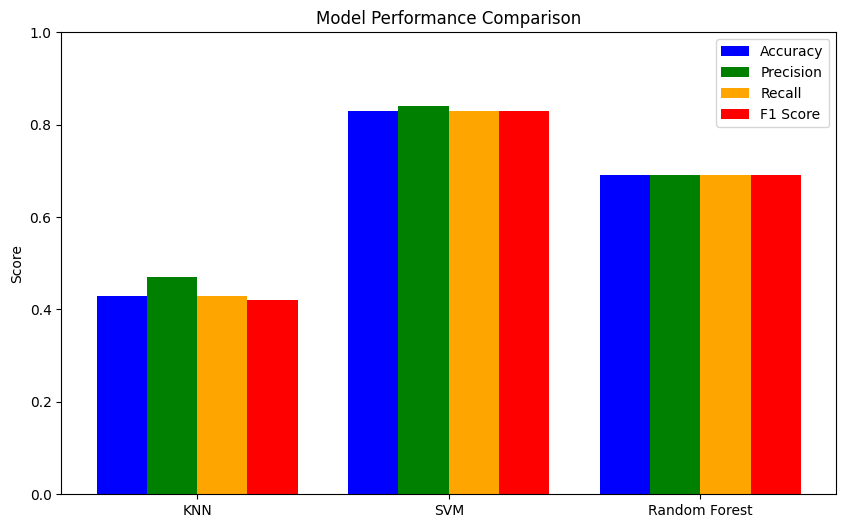

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ["KNN", "SVM", "Random Forest"]

# Performance metrics
accuracy = [0.43, 0.83, 0.69]
precision = [0.47, 0.84, 0.69]
recall = [0.43, 0.83, 0.69]
f1_score = [0.42, 0.83, 0.69]

# Bar width and X-axis positions
bar_width = 0.2
x = np.arange(len(models))

# Plot bars for each metric
plt.figure(figsize=(10,6))
plt.bar(x - bar_width*1.5, accuracy, width=bar_width, label='Accuracy', color='blue')
plt.bar(x - bar_width/2, precision, width=bar_width, label='Precision', color='green')
plt.bar(x + bar_width/2, recall, width=bar_width, label='Recall', color='orange')
plt.bar(x + bar_width*1.5, f1_score, width=bar_width, label='F1 Score', color='red')

# Labels and title
plt.xticks(x, models)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.ylim(0, 1)  # Setting Y-axis range from 0 to 1 for better visualization

# Show plot
plt.show()
